# Feature Extraction

딥러닝이 나오기 전에는 이미지를 서로 구분할 수 있는 핵심적 특징을 수치로 표현하고 이 수치를 분포 차이를 이용하여 이미지를 인식하는 방법을 사용했다. 이 방법은 훌륭하지만, Feature를 만들어 내는 것이 고통스러운 작업이다.

<img src="https://i.imgur.com/Yzq3JFD.jpg" width="100%">

# Convolutional Layer

**Feature Extraction + Classification**

CNN 처리 과정은 크게 두 과정을 구분된다.<br>
첫 번째 과정은 이미지로부터 Feature를 Extraction 하는 과정이다. 다음은 Feature를 이용하여 딥러닝을 수행하는 것이다.<br>
Feature Extraction은 Convolutional Layer를 이용하여 이미지의 특징을 추출하고 Pooling Layer에서 대표값을 만드는 과정을 반복하여 특징을 단순화해간다.<br>
단순화된 특징은 이미지를 구별할 수 있는 간결한 특징만 남고 판별에 도움이 되지 않는 자세한 이미지 정보는 삭제된다.<br>
CNN은 사람이 이미지를 인식하는 과정과 유사하다. 사람이 이미지를 볼 때, 이미지 전체를 학습하는 것이 아니라 몇 개의 특징을 학습한다고 한다.

# Zero Padding

필터를 통과하면서 이미지 크기가 줄어드는 것을 방지하는 방법으로 Zero Padding을 사용할 수도 있다. Zero Padding은 원본 이미지에 0으로 이루어진 부분을 추가하여 이미지를 크게 만들어 주는 것이다. 5x5 이미지가 3x3 필터를 통과하면 3x3 이미지로 변환되는데 5x5 이미지에 zero padding을 끼워 7x7로 만든 다음 3x3 필터를 통과시키면 5x5 이미지가 되어 이미지의 크기가 유지된다.<br>
Zero Padding을 사용한느 또 하나의 이유는 '0'을 포함하여 어느 부분이 가장자리인지 알려줄 수 있기 때문이다.

(1, 3, 3, 1)


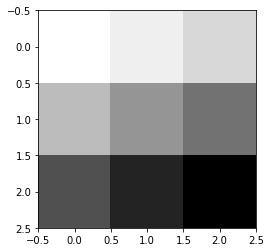

In [0]:
# cnnToyImage.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

print (image.shape)         # (batch, height, width, channel)
plt.grid(False)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()

In [0]:
weight=tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print ("weight.shape", weight.shape)    # (height, width, channel, filters)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape )
print(conv2d_img)

weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


In [0]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d = tf.nn.relu(conv2d)
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img)

conv2d_img.shape (1, 3, 3, 1)
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]


In [0]:
image=np.array([[[[1,1,1],[2,2,2],[3,3,3]],
                 [[4,4,4],[5,5,5],[6,6,6]],
                 [[7,7,7],[8,8,8],[9,9,9]]]], dtype=np.float32)
print (image.shape)
weight=tf.constant([[[[1.],[1.],[1.]],[[1.],[1.],[1.]]],
                    [[[1.],[1.],[1.]],[[1.],[1.],[1.]]]])
print ("weight.shape", weight.shape)

conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img)

(1, 3, 3, 3)
weight.shape (2, 2, 3, 1)
conv2d_img.shape (1, 2, 2, 1)
[[[[36.]
   [48.]]

  [[72.]
   [84.]]]]


In [0]:
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

weight=tf.constant([[[[1.,10., -1.]],[[1.,10., -1.]]],
                    [[[1.,10., -1.]],[[1.,10., -1.]]]])
print ("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img)

weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


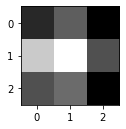

[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]


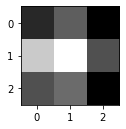

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


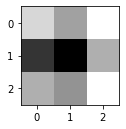

In [0]:
# plotting Code
conv2d_img=np.swapaxes(conv2d_img, 0,3)
for i, one_img in enumerate(conv2d_img):
    print (one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.grid(False), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()

11493376/11490434 [==============================] - 0s 0us/step


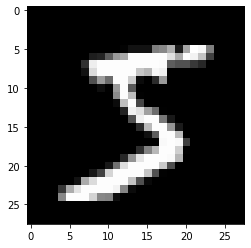

In [0]:
# Mnist_convLayer.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

img=train_x[0]
plt.imshow(img, cmap='gray')
plt.show()

In [0]:
img=img.reshape(-1,28,28,1)
W1=tf.random.normal([3,3,1,5], stddev=0.01)
W1

<tf.Tensor: shape=(3, 3, 1, 5), dtype=float32, numpy=
array([[[[ 0.0184574 , -0.01170227,  0.00828892, -0.01142316,
           0.00205196]],

        [[-0.0060019 , -0.00150527,  0.00422387,  0.00921819,
           0.0038018 ]],

        [[-0.04055589, -0.00293045,  0.0019571 ,  0.0254155 ,
           0.00314312]]],


       [[[-0.01401243, -0.00277041,  0.01457643, -0.00421239,
          -0.01014566]],

        [[ 0.02243598,  0.0225643 , -0.00235105,  0.00738867,
          -0.00871697]],

        [[ 0.00612691, -0.00629935,  0.00136519,  0.01544933,
          -0.00366551]]],


       [[[ 0.00063295, -0.00122113,  0.00763885, -0.00881646,
           0.00395189]],

        [[ 0.00226791,  0.00230267, -0.01173156, -0.01526328,
          -0.00885781]],

        [[-0.00649816, -0.00420148,  0.00868593, -0.00731919,
          -0.01122164]]]], dtype=float32)>

conv2d_img (1, 14, 14, 5)


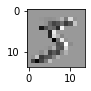

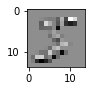

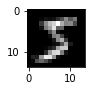

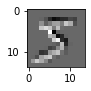

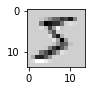

In [0]:
conv2d=tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
conv2d_img=conv2d.numpy()
print('conv2d_img',conv2d_img.shape)
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray'), plt.show()

pool_img (1, 7, 7, 5)


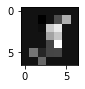

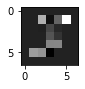

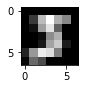

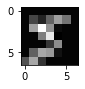

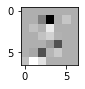

In [0]:
pool=tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
pool_img=pool.numpy()
print('pool_img',pool_img.shape)
pool_img=np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray'), plt.show()

In [0]:
# Mnist_CNN_TF2.ipynb

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)
train_y_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = models.Sequential()
# (B, 28, 28, 1)
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))    # w: 1*3*3*32+32=320
# (B, 26, 26, 32)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 13, 13, 32)
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # w: 32*3*3*64+64=18496
# (B, 11, 11, 64)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 5, 5, 64)
model.add(layers.Flatten())
# (B, 1600)
model.add(layers.Dense(10, activation='softmax'))       # w: 1600*10+10=16010
# (B, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_y_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1591 - accuracy: 0.9524
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9925


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_y_onehot, verbose=2)

313/313 - 1s - loss: 0.0273 - accuracy: 0.9917


In [0]:
print(test_acc)

0.9916999936103821


In [0]:
# Mnist_CNNDNN_TF2.ipynb

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)
train_y_onehot[0]

11493376/11490434 [==============================] - 0s 0us/step


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = models.Sequential()
# (B, 28, 28, 1)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# (B, 28, 28, 32)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 14, 14, 32)
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# (B, 14, 14, 64)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 7, 7, 64)
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# (B, 7, 7, 64)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 3, 3, 64)
model.add(layers.Flatten())
# (B, 576)
model.add(layers.Dense(128, activation='relu'))
# (B, 128)
model.add(layers.Dense(64, activation='relu'))
# (B, 64)
model.add(layers.Dense(10, activation='softmax'))
# (B, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_y_onehot, batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 2s 4ms/step - loss: 0.2199 - accuracy: 0.9311
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0584 - accuracy: 0.9819
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0303 - accuracy: 0.9905
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0267 - accuracy: 0.9918


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_y_onehot, verbose=2)

313/313 - 1s - loss: 0.0321 - accuracy: 0.9902


In [0]:
print(test_acc)

0.9901999831199646


In [0]:
# FashionMnist.ipynb

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


y = 2 Pullover


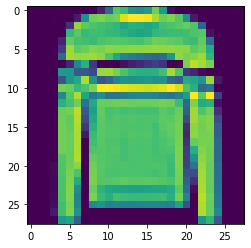

Number of train data - 60000
Number of test data - 10000


In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])
plt.show()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))


In [0]:
# 6만장 중, 1~55000장은 train, 55000~60000은 valid dataSet
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print(x_train.shape, x_valid.shape)
print(y_train.shape, y_valid.shape)

(55000, 28, 28) (5000, 28, 28)
(55000,) (5000,)


In [0]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


<center><img src="https://drive.google.com/uc?id=1eMJDywkwenvNfRUIPUEzsK-vomeNVIQ1" width="800" height="400"></center>

In [0]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
# (B, 28, 28, 1)
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
# (B, 28, 28, 64)
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# (B, 14, 14, 64)
model.add(tf.keras.layers.Dropout(0.3))
# (B, 14, 14, 64)
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# (B, 14, 14, 64)
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# (B, 7, 7, 32)
model.add(tf.keras.layers.Dropout(0.3))
# (B, 7, 7, 32)
model.add(tf.keras.layers.Flatten())
# (B, 1568)
model.add(tf.keras.layers.Dense(256, activation='relu'))
# (B, 256)
model.add(tf.keras.layers.Dropout(0.5))
# (B, 256)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# (B, 10)

# Take a look at the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [0]:
import time
s = time.time()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid) ,verbose=2)


# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
e = time.time()
print(e-s)

Epoch 1/10
860/860 - 4s - loss: 0.5958 - accuracy: 0.7831 - val_loss: 0.3806 - val_accuracy: 0.8650
Epoch 2/10
860/860 - 3s - loss: 0.4168 - accuracy: 0.8484 - val_loss: 0.3188 - val_accuracy: 0.8882
Epoch 3/10
860/860 - 4s - loss: 0.3776 - accuracy: 0.8625 - val_loss: 0.3148 - val_accuracy: 0.8870
Epoch 4/10
860/860 - 4s - loss: 0.3500 - accuracy: 0.8721 - val_loss: 0.2884 - val_accuracy: 0.8936
Epoch 5/10
860/860 - 4s - loss: 0.3267 - accuracy: 0.8815 - val_loss: 0.2656 - val_accuracy: 0.9076
Epoch 6/10
860/860 - 4s - loss: 0.3132 - accuracy: 0.8861 - val_loss: 0.2606 - val_accuracy: 0.9054
Epoch 7/10
860/860 - 4s - loss: 0.2973 - accuracy: 0.8901 - val_loss: 0.2481 - val_accuracy: 0.9050
Epoch 8/10
860/860 - 4s - loss: 0.2871 - accuracy: 0.8951 - val_loss: 0.2472 - val_accuracy: 0.9048
Epoch 9/10
860/860 - 4s - loss: 0.2798 - accuracy: 0.8981 - val_loss: 0.2329 - val_accuracy: 0.9126
Epoch 10/10
860/860 - 4s - loss: 0.2742 - accuracy: 0.8993 - val_loss: 0.2357 - val_accuracy: 0.9124

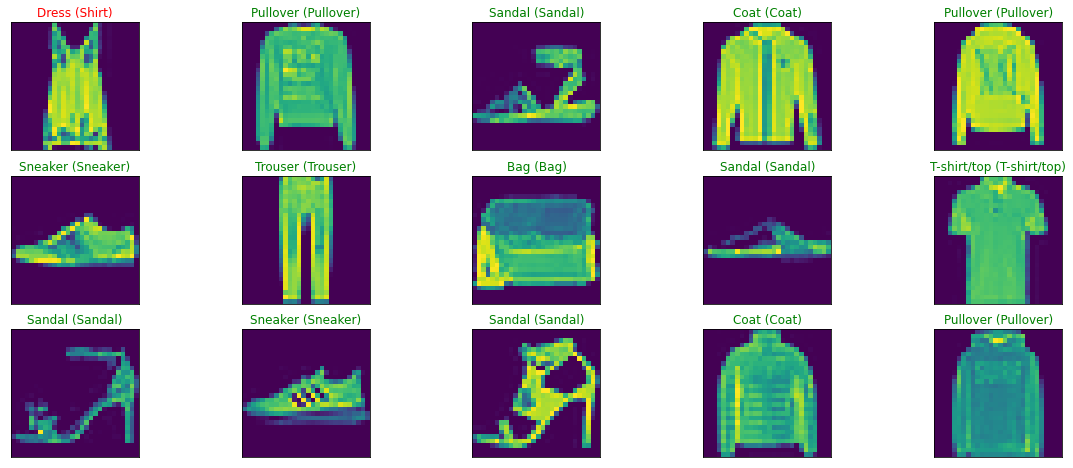

In [0]:
import numpy as np
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [0]:
# image2np.ipynb

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import matplotlib.image as mpimg
import csv

def conv2np(fname):
    # 그림 한장을 flatten 해서 수치로 출력한다.
    # 32 * 32 * 3 = 3072개 숫자를 리턴한다.
   image=mpimg.imread(fname)
   return image.reshape(3072)


def csvWriter(folder, csvName):
    # 입력 폴더에서 이미지 리스트를 만들고 리스트에서 이미지를 하나씩 꺼내 (X, Y) 데이터를 생성
    # "cifar3Train.csv", "cifar3Test.csv" 로 저장
    images = os.listdir(folder)

    xData = []
    yData = []
    for image in images:
        if image.find('airplane') >= 0:     yData.append([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        elif image.find('automobile') >= 0: yData.append([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
        elif image.find('bird') >= 0:       yData.append([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
        elif image.find('cat') >= 0:        yData.append([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
        elif image.find('deer') >= 0:       yData.append([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
        elif image.find('dog') >= 0:        yData.append([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
        elif image.find('frog') >= 0:       yData.append([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
        elif image.find('horse') >= 0:      yData.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
        elif image.find('ship') >= 0:       yData.append([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
        elif image.find('truck') >= 0:      yData.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
        else:
            print("error")
        xData.append(conv2np(folder+image))

    f = open("./"+csvName, 'w', newline='')
    writer = csv.writer(f)

    for i in range(len(yData)):
        temp = xData[i].tolist() + yData[i]
        writer.writerow(temp)

    f.close()

csvWriter("D:/CNN/CIFAR10/train/", "cifar3Train.csv")
csvWriter("D:/CNN/CIFAR10/test/", "cifar3Test.csv")

# CIFAR 10

* 배경이 포함되어있는 이미지

In [0]:
# Cifar10_74_TF2.ipynb

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
# x_train.shape = (50000, 32, 32, 3)
# x_test.shape = (10000, 32, 32, 3)

print(x_train.shape[1:])
img_rows, img_cols, _ = x_train.shape[1:]

X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(Y_train[0])
num_classes = 10
batch_size = 32
print(input_shape)

(32, 32, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(32, 32, 3)


In [0]:
# functional api model

x = layers.Input(shape=input_shape,  name='input')
# (B, 32, 32, 3)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',  name='conv1')(x)
# (B, 30, 30, 32)
h = layers.Dropout(0.2)(h)
# (B, 30, 30, 32)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv2')(h)
# (B, 30, 30, 32)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool1')(h)
# (B, 15, 15, 32)
h = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='conv3')(h)
# (B, 15, 15, 64)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool2')(h)
# (B, 7, 7, 64)
h = layers.Flatten()(h)
# (B, 3136)
h = layers.Dropout(0.2)(h)
# (B, 3136)
h = layers.Dense(512, activation='relu', name='poolhidden')(h)
# (B, 512)
h = layers.Dropout(0.2)(h)
# (B, 512)
y = layers.Dense(num_classes, activation='softmax', name='output')(h)
# (B, 10)

model = models.Model(x, y)
print(model.summary())
epochs = 25
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# The professor says that it siuation is overfitting.
# As the epoch increases, the loss of the train set decreases,
# but the loss of the validation set does not decrease.
history = model.fit(X_train, Y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.1, verbose=2)

score = model.evaluate(X_test, Y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 30, 30, 32)        9248      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 15, 15, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 64)          0     

### BatchNormalization

In [0]:
# Cifar10_79_TF2.ipynb
# BatchNormalization

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
print(x_train.shape[1:])
img_rows, img_cols, _ = x_train.shape[1:]

X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(Y_train[0])
num_classes = 10
batch_size = 32
print(input_shape)


(32, 32, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(32, 32, 3)


In [0]:
x = layers.Input(shape=input_shape,  name='input')
h = layers.BatchNormalization()(x)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',  name='conv1')(h)
h = layers.Dropout(0.2)(h)
h = layers.BatchNormalization()(h)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv2')(h)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool1')(h)
h = layers.BatchNormalization()(h)
h = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='conv3')(h)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool2')(h)
h = layers.Flatten()(h)
h = layers.Dropout(0.2)(h)
h = layers.BatchNormalization()(h)
h = layers.Dense(512, activation='relu', name='hidden')(h)
h = layers.Dropout(0.2)(h)
h = layers.BatchNormalization()(h)
y = layers.Dense(num_classes, activation='softmax', name='output')(h)

model = models.Model(x, y)
print(model.summary())
epochs = 25
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.1, verbose=2)

score = model.evaluate(X_test, Y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2 (Conv2D)               (None, 30, 30, 32)        9248      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 15, 15, 32)        0     

### Kernel Regurization

In [0]:
# Cifar10_84_ TF2.ipynb
# Kernel regurization

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [0]:
print(x_train.shape[1:])
img_rows, img_cols, _ = x_train.shape[1:]

X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(Y_train[0])
num_classes = 10
batch_size = 32
print(input_shape)


(32, 32, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(32, 32, 3)


In [0]:
x = layers.Input(shape=input_shape,  name='input')
h = layers.BatchNormalization()(x)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv1')(h)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv2')(h)
h = layers.BatchNormalization()(h)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool1')(h)
h = layers.Dropout(0.2)(h)

h = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv3')(h)
h = layers.BatchNormalization()(h)
h = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv4')(h)
h = layers.BatchNormalization()(h)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool2')(h)
h = layers.Dropout(0.3)(h)
h = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv5')(h)
h = layers.BatchNormalization()(h)
h = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv6')(h)
h = layers.BatchNormalization()(h)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool3')(h)
h = layers.Dropout(0.4)(h)

h = layers.Flatten()(h)
y = layers.Dense(num_classes, activation='softmax', name='output')(h)


model = models.Model(x, y)
print(model.summary())
epochs = 25
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.1, verbose=2)

score = model.evaluate(X_test, Y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0   

### ImageDataGenerator

In [0]:
# ImageDataGenerator.ipynb

from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import tensorflow as tf
import numpy as np

In [0]:
img = tf.keras.preprocessing.image.load_img('/gdrive/My Drive/University Lecture/데이터마이닝/Images/Pinarello-Dogma.jpg')
x = tf.keras.preprocessing.image.img_to_array(img)

In [0]:
img = tf.keras.preprocessing.image.load_img('/gdrive/My Drive/University Lecture/데이터마이닝/Images/Pinarello-Dogma.jpg')
x = tf.keras.preprocessing.image.img_to_array(img)      # x.shape = (667, 1000, 3)
x = x.reshape((1,) + x.shape)                           # x.shape = (1, 667, 1000, 3)

In [0]:
data_aug_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                         rotation_range=15,
                                                         width_shift_range=0.1,
                                                         height_shift_range=0.1,
                                                         shear_range=0.5,
                                                         zoom_range=[0.8, 2.0],
                                                         horizontal_flip=True,
                                                         vertical_flip=True,
                                                         fill_mode='nearest')

imageGen = data_aug_gen.flow(x, batch_size=1)

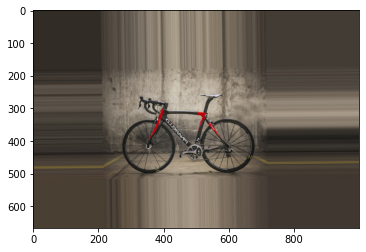

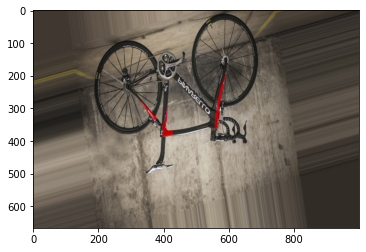

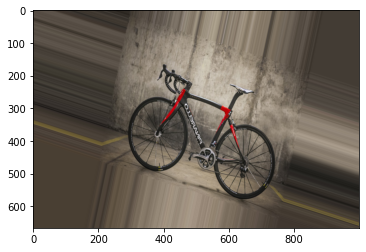

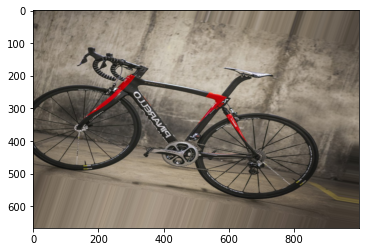

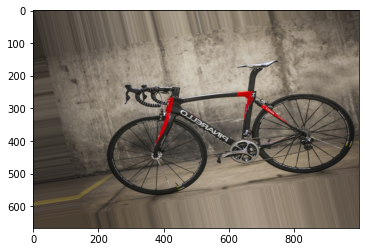

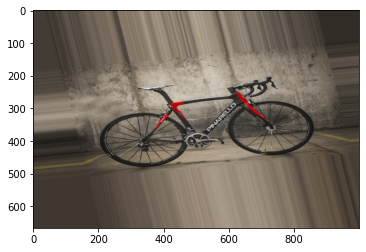

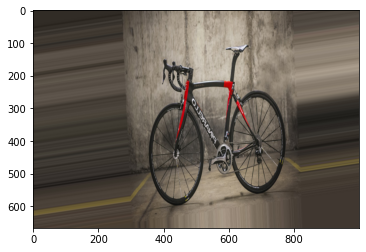

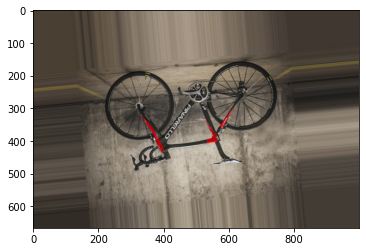

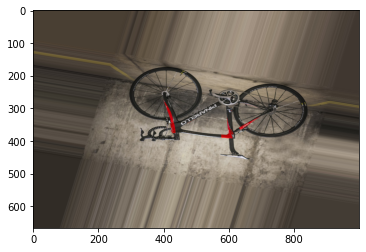

In [0]:
import matplotlib.pyplot as plt
imgCnt = 0
for img in imageGen:
    imgCnt += 1
    if imgCnt < 10:
        plt.imshow(img.reshape((667, 1000, 3)))
        plt.show()
    else:
        break


In [0]:
# Cifar10_88_TF2.ipynb
# ImageDataGenerator

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

170500096/170498071 [==============================] - 94s 1us/step


In [0]:
print(x_train.shape[1:])
img_rows, img_cols, _ = x_train.shape[1:]

X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(Y_train[0])
num_classes = 10
batch_size = 32
print(input_shape)


(32, 32, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(32, 32, 3)


In [0]:
x = layers.Input(shape=input_shape,  name='input')
h = layers.BatchNormalization()(x)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv1')(h)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv2')(h)
h = layers.BatchNormalization()(h)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool1')(h)
h = layers.Dropout(0.2)(h)

h = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv3')(h)
h = layers.BatchNormalization()(h)
h = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv4')(h)
h = layers.BatchNormalization()(h)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool2')(h)
h = layers.Dropout(0.3)(h)
h = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv5')(h)
h = layers.BatchNormalization()(h)
h = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_regularizer=tf.keras.regularizers.l2(1.E-04), name='conv6')(h)
h = layers.BatchNormalization()(h)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool3')(h)
h = layers.Dropout(0.4)(h)

h = layers.Flatten()(h)
y = layers.Dense(num_classes, activation='softmax', name='output')(h)


model = models.Model(x, y)
print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0     

### learning rate scheduler

In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003
    return lrate

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(X_train)
print(x_train.shape[0] // batch_size)
epochs = 125
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size), \
                    steps_per_epoch=2000, epochs=epochs, verbose=2,
                    validation_data=(X_test, Y_test), callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)])

score = model.evaluate(X_test, Y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('cifar_88.h5')

1562
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/125
1563/2000 - 32s - loss: 1.9222 - accuracy: 0.3975 - val_loss: 1.2815 - val_accuracy: 0.5620 - lr: 0.0010
313/313 [==============================] - 1s 3ms/step - loss: 1.2815 - accuracy: 0.5620

Test loss: 1.2815182209014893
Test accuracy: 0.5619999766349792


# Cat and Dog

In [0]:
# Cat_Dog_CNN_ImageGen_Train_TF2.py

import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

base_dir = 'd:/cat_dog_smallData'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.SGD(lr=0.01, momentum=0.9),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

model.save('Cat_Dog_CNN_ImageGen.h5')

In [0]:
# Cat_Dog_CNN_ImageGen_Test_TF2.py

import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from keras.applications import VGG16
base_dir = 'd:/cat_dog_smallData'
test_dir = os.path.join(base_dir, 'test')

model = models.load_model('Cat_Dog_CNN_ImageGen.h5')
print(model.summary())

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        class_mode='binary',
        shuffle=False)
test_loss, test_acc = model.evaluate_generator(test_generator)
print(test_acc)
probabilities = model.predict_generator(test_generator)
print(test_generator.class_indices)
err = 0
for i, prob in enumerate(probabilities):
        if (prob > 0.5) and ('cat' in test_generator.filenames[i]):
                print(test_generator.filenames[i])
                err += 1
        if (prob < 0.5) and ('dog' in test_generator.filenames[i]):
                err += 1
                print(test_generator.filenames[i])
print(err)

# Transfer Learning

In [0]:
# Cat_Dog_VGG_Train_Tf2.py

import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16

base_dir = 'd:/cat_dog_smallData'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False
print(model.summary())

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.SGD(lr=0.001, momentum=0.9),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

model.save('Cat_Dog_VGG16.h5')

# AutuEncoder

<img src='https://i.postimg.cc/VNp9ctR1/image.png' width='100%'>

# PCA

<img src='https://i.postimg.cc/PrWSzSMD/image.png' width='100%'>

<img src='https://i.postimg.cc/RhRvwcpz/11.jpg' width='100%'>

<img src='https://i.postimg.cc/s27dpY10/22.jpg' width='100%'>

In [0]:
# PCA.ipynb

import numpy as np

x = np.array([[1, 2, 3],
              [2, 4, 5],
              [3, 7, 6],
              [4, 7, 7]])

np.cov(x, ddof=1, rowvar=0)

array([[1.66666667, 3.        , 2.16666667],
       [3.        , 6.        , 4.        ],
       [2.16666667, 4.        , 2.91666667]])

Sxy = ((x[i]-x_bar)(y[i]-y_bar))/(n-1)<br>
위의 식을 모든 i에 대하여 구하고 합을 구하면 Sxy를 구할 수 있다. 이를 np.cov로 구할 때, default 설정은 Sxy 구하는 식에서 n으로 나누지만, ddof=1 설정은 n-1로 나눈다.

In [0]:
def standardScaler(X):
    return (X - np.mean(X, axis = 0)) / np.std(X, ddof = 1, axis = 0)

x_norm = standardScaler(x)
x_norm

array([[-1.161895  , -1.22474487, -1.3174651 ],
       [-0.38729833, -0.40824829, -0.14638501],
       [ 0.38729833,  0.81649658,  0.43915503],
       [ 1.161895  ,  0.81649658,  1.02469508]])

In [0]:
np.cov(x_norm, ddof=1, rowvar=0)

array([[1.        , 0.9486833 , 0.98270763],
       [0.9486833 , 1.        , 0.95618289],
       [0.98270763, 0.95618289, 1.        ]])

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
proj = pca.fit_transform(x_norm) # PCA Score 
proj

array([[ 2.13871405e+00, -9.87784130e-03, -1.07326328e-01],
       [ 5.43064902e-01, -9.93796928e-02,  1.82481305e-01],
       [-9.46945423e-01,  3.35884161e-01,  7.58467885e-05],
       [-1.73483353e+00, -2.26626627e-01, -7.52308241e-02]])

In [0]:
diag = np.diag(pca.explained_variance_) # eigen values
diag

array([[2.92512342, 0.        , 0.        ],
       [0.        , 0.05805056, 0.        ],
       [0.        , 0.        , 0.01682602]])

In [0]:
np.sum(diag)

3.0000000000000027

In [0]:
eVector = pca.components_.T
eVector

array([[-0.57863474, -0.47810253, -0.66075699],
       [-0.57328039,  0.81467958, -0.08744579],
       [-0.58011329, -0.32819986,  0.74548872]])

In [0]:
cov = np.dot(np.dot(eVector, diag), eVector.T)
cov


array([[1.        , 0.9486833 , 0.98270763],
       [0.9486833 , 1.        , 0.95618289],
       [0.98270763, 0.95618289, 1.        ]])

(1797, 64)


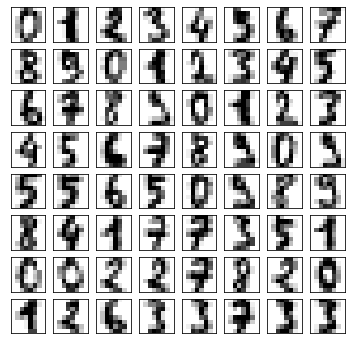

In [0]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np
digits = load_digits()
print(digits.data.shape)     # digits는 (1797, 64) 데이터로 8*8 숫자 이미지다.
fig = plt.figure(figsize=(6, 6)) # figure size in inches
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')



In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digits.data)
digits.data = scaler.transform(digits.data)
np.mean(digits.data[:,43]), np.std(digits.data[:,43])   # mean=0, std=1


(9.094314369773124e-17, 1.000000000000003)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64)
proj = pca.fit_transform(digits.data) # PCA Score 
proj.shape  # proj는 PCA를 통해 (1797,3) 데이터로 64개의 차원을 3차원으로 줄인 데이터다.


(1797, 64)

In [0]:
diag = np.diag(pca.explained_variance_)
diag

array([[7.34477606e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.83549054e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.15396118e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.97430140e-31, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.90222011e-32, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.84266959e-32]])

In [0]:
np.sum(diag)

61.03396436525619

In [0]:
eVector = pca.components_

In [0]:
cov = np.dot(np.dot(eVector, diag), eVector.T)
cov

array([[ 1.29957210e+00, -9.14078178e-02,  1.41877356e-01, ...,
        -2.25437889e-16, -1.58758523e-16,  6.34062845e-18],
       [-9.14078178e-02,  8.55031581e-01, -2.35686048e-01, ...,
        -8.77890102e-17,  3.50021641e-17,  4.72659026e-18],
       [ 1.41877356e-01, -2.35686048e-01,  5.27086813e-01, ...,
         1.99259716e-16, -7.83384809e-18, -2.92409631e-17],
       ...,
       [-2.25437889e-16, -8.77890102e-17,  1.99259716e-16, ...,
         3.99082642e-01,  1.82528813e-03,  2.90956631e-33],
       [-1.58758523e-16,  3.50021641e-17, -7.83384809e-18, ...,
         1.82528813e-03,  2.58296665e-01,  3.85000566e-33],
       [ 6.34062845e-18,  4.72659026e-18, -2.92409631e-17, ...,
         2.90956631e-33,  3.85000566e-33,  7.34477606e+00]])

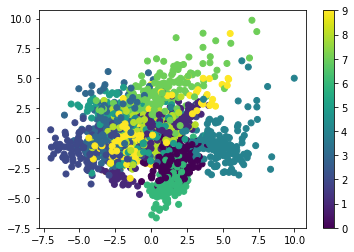

In [0]:
# 3차원으로 줄였어도 3차원 공간에서 점들이 군집화 되어 있어 
# 0~9까지의 숫자의 특징을 어느정도 보유하고 있음을 알 수 있다. 
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

# Noise Reduction

<img src='https://i.postimg.cc/QNwGVN8M/image.png' width='100%'>

In [0]:
# Mnist_AE_TF2.ipynb

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(train_images, _), (test_images, _) = datasets.mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0


11493376/11490434 [==============================] - 0s 0us/step


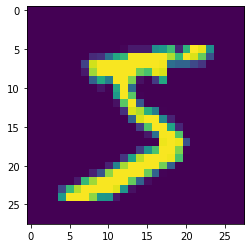

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28))
plt.show()

In [0]:
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

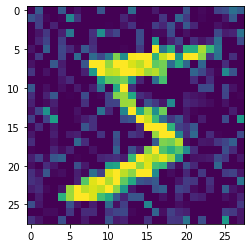

In [0]:
plt.imshow(train_images_noisy[0].reshape(28,28))
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=784))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(784, activation='sigmoid'))      # 모든 값들을 0~1 사이로 맞춰주기 위함
model.summary()
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=adam, loss='binary_crossentropy')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(train_images_noisy, train_images_noisy,
                epochs=50,
                batch_size=100,
                shuffle=True,
                verbose = 2)

decoded_imgs = model.predict(test_images_noisy)

Epoch 1/50
600/600 - 1s - loss: 0.3607
Epoch 2/50
600/600 - 1s - loss: 0.3400
Epoch 3/50
600/600 - 1s - loss: 0.3375
Epoch 4/50
600/600 - 1s - loss: 0.3364
Epoch 5/50
600/600 - 1s - loss: 0.3357
Epoch 6/50
600/600 - 1s - loss: 0.3350
Epoch 7/50
600/600 - 1s - loss: 0.3347
Epoch 8/50
600/600 - 1s - loss: 0.3343
Epoch 9/50
600/600 - 1s - loss: 0.3340
Epoch 10/50
600/600 - 1s - loss: 0.3338
Epoch 11/50
600/600 - 1s - loss: 0.3337
Epoch 12/50
600/600 - 1s - loss: 0.3336
Epoch 13/50
600/600 - 1s - loss: 0.3333
Epoch 14/50
600/600 - 1s - loss: 0.3332
Epoch 15/50
600/600 - 1s - loss: 0.3331
Epoch 16/50
600/600 - 1s - loss: 0.3330
Epoch 17/50
600/600 - 1s - loss: 0.3330
Epoch 18/50
600/600 - 1s - loss: 0.3329
Epoch 19/50
600/600 - 1s - loss: 0.3328
Epoch 20/50
600/600 - 1s - loss: 0.3327
Epoch 21/50
600/600 - 1s - loss: 0.3326
Epoch 22/50
600/600 - 1s - loss: 0.3326
Epoch 23/50
600/600 - 1s - loss: 0.3325
Epoch 24/50
600/600 - 1s - loss: 0.3326
Epoch 25/50
600/600 - 1s - loss: 0.3323
Epoch 26/

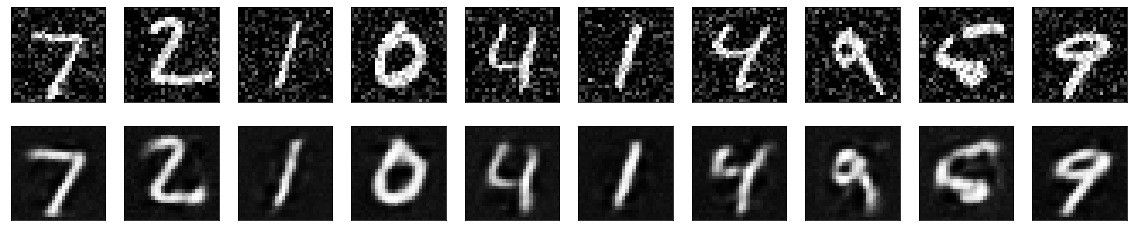

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [0]:
# Mnist_AE_CNN_TF2.ipynb

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(train_images, _), (test_images, _) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0


In [0]:
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

In [0]:
model = models.Sequential()
# (B, 28, 28, 1)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# (B, 28, 28, 32)
model.add(layers.MaxPooling2D((2, 2), padding='same'))
# (B, 14, 14, 32)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# (B, 14, 14, 32)
model.add(layers.MaxPooling2D((2, 2), padding='same'))
# (B, 7, 7, 32)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# (B, 7, 7, 32)
model.add(layers.UpSampling2D((2, 2)))
# (B, 14, 14, 32)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# (B, 14, 14, 32)
model.add(layers.UpSampling2D((2, 2)))
# (B, 28, 28, 32)
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
# (B, 28, 28, 1)

model.summary()

model.compile(optimizer='adadelta', loss='binary_crossentropy')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)       

In [0]:
model.fit(train_images_noisy, train_images_noisy,
                epochs=100,
                batch_size=128,
                shuffle=True,
                verbose = 2)

decoded_imgs = model.predict(test_images_noisy)

Epoch 1/100
469/469 - 2s - loss: 0.6820
Epoch 2/100
469/469 - 2s - loss: 0.6596
Epoch 3/100
469/469 - 2s - loss: 0.6194
Epoch 4/100
469/469 - 2s - loss: 0.5880
Epoch 5/100
469/469 - 2s - loss: 0.5744
Epoch 6/100
469/469 - 2s - loss: 0.5639
Epoch 7/100
469/469 - 2s - loss: 0.5524
Epoch 8/100
469/469 - 2s - loss: 0.5390
Epoch 9/100
469/469 - 2s - loss: 0.5223
Epoch 10/100
469/469 - 2s - loss: 0.5013
Epoch 11/100
469/469 - 2s - loss: 0.4761
Epoch 12/100
469/469 - 2s - loss: 0.4496
Epoch 13/100
469/469 - 2s - loss: 0.4266
Epoch 14/100
469/469 - 2s - loss: 0.4109
Epoch 15/100
469/469 - 2s - loss: 0.4016
Epoch 16/100
469/469 - 2s - loss: 0.3959
Epoch 17/100
469/469 - 2s - loss: 0.3921
Epoch 18/100
469/469 - 2s - loss: 0.3891
Epoch 19/100
469/469 - 2s - loss: 0.3866
Epoch 20/100
469/469 - 2s - loss: 0.3844
Epoch 21/100
469/469 - 2s - loss: 0.3824
Epoch 22/100
469/469 - 2s - loss: 0.3807
Epoch 23/100
469/469 - 2s - loss: 0.3791
Epoch 24/100
469/469 - 2s - loss: 0.3777
Epoch 25/100
469/469 - 2s

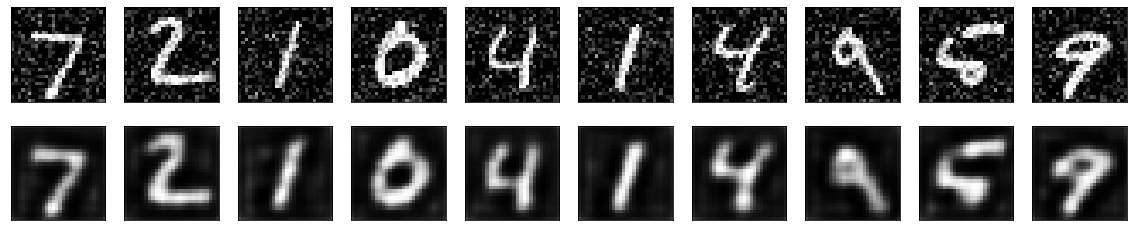

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Anomaly Detection

<img src='https://i.postimg.cc/QN28wJWS/image.png' width='100%'>

In [0]:
# AnomalyDetection_Mnist_TF2.ipynb

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
(train_images, _), (test_images, _) = datasets.mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=784))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(784, activation='sigmoid'))
model.summary()
adam = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='binary_crossentropy')
model.fit(train_images, train_images,
                epochs=15,
                batch_size=32,
                shuffle=True,
                verbose = 2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 - 3s - loss: 0.1289
Epoch 2/15
1875/1875 - 3s - loss: 0.1093
Epoch 3/15
1875/1875 - 3s - loss: 0.1072
Epoch 4/15
1875/1875 - 3s - loss: 0.1059
Epoch 5/15
1875/1875 - 3s - loss: 0.1055
Epoch 6/15
1875/1875 - 3s - loss: 0.1051


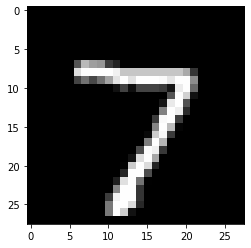

In [0]:
original = test_images[0].reshape(28,28)
plt.imshow(original)
plt.gray()

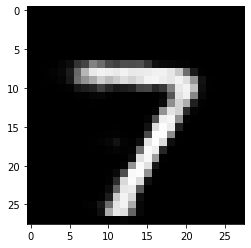

In [0]:
decoded = model.predict(test_images[0].reshape(1,784))
decoded = decoded.reshape(28,28)
plt.imshow(decoded)
plt.gray()

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


(1, 784)


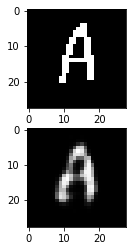

In [0]:
filename = '/gdrive/My Drive/University Lecture/데이터마이닝/Images/a.png'
image = mpimg.imread(filename)
image = image[:,:,0]
image = (np.where(image == 0, 1, 0))
image = image.flatten()
image = image.reshape(1,784)
aeResult = model.predict(image)
print(aeResult.shape)
arr1 = np.array(image)
arr2 = np.array(aeResult)
arr1.shape=(28,28)
arr2.shape=(28,28)
plt.subplot(211)
plt.imshow(arr1)
plt.subplot(212)
plt.imshow(arr2)
plt.show()

In [0]:
np.corrcoef(image.reshape(784), aeResult.reshape(784))  # A

array([[1.        , 0.84977713],
       [0.84977713, 1.        ]])

In [0]:
np.corrcoef(test_images[0], decoded.reshape(784))       # 7

array([[1.       , 0.9616785],
       [0.9616785, 1.       ]])

# Colorization

<img src='https://i.postimg.cc/XqfYQrxn/image.png' width='100%'>

In [0]:
# Colorization_TF2.ipynb



# Question

1. CNN에서 C는 무엇인가?
 * convolutional

2. Mnist CNN의 정확도는?
 * 99%

3. fashion mnist의 이미지 크기는?
 * 28 x 28 x 1

4. model.Sequential 말고 사용되는 model api는?
 * funtional api

5. cifar10 데이터셋의 이미지 크기는?<br>
 * 32x32x3

6. 전이학습 모형이 아닌 것은?<br>
 * VGG16(O), VGG18(X), VGG19(O)

7. 오토인코더에 설명으로 틀린 것은?
 * supervised learning 이다. --> 틀린 설명
 * unsupervised learning이다. --> 맞는 설명

8. 오토인코더의 응용분야가 아닌것은?
 * Colorization --> 응용분야 O
 * Image Search --> 응용분야 0
 * Image 확대 --> 응용분야 X